In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds

In [2]:
(dataset_train_original, dataset_validate_original), info = tfds.load(
    "cifar10",
    split=["train", "test"],
    as_supervised=True,
    with_info=True
)
info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='C:\\Users\\DAnand\\tensorflow_datasets\\cifar10\\3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky}

# Look at your beeping data

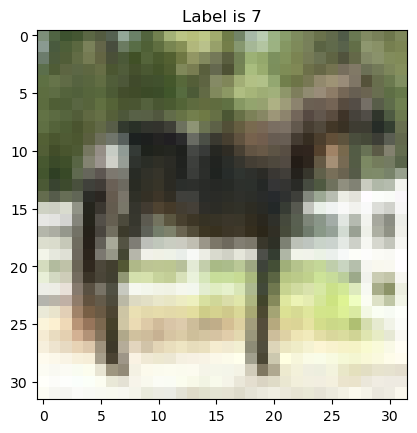

In [3]:
for x,y in dataset_train_original.shuffle(100).take(1):
    # print(type(x), type(y))
    plt.imshow(x.numpy().squeeze(), cmap="gray")
    plt.title(f"Label is {y}")

In [4]:
dir(dataset_train_original)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for

# Data preprocessing

0.97647065


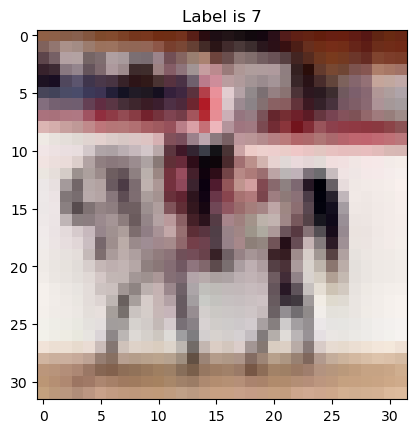

In [5]:
def encode(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label



dataset = dataset_train_original.map(lambda image, label: encode(image, label))

for x,y in dataset.take(1):
    # print(type(x), type(y))
    plt.imshow(x.numpy().squeeze(), cmap="gray")
    plt.title(f"Label is {y}")
    print(np.max(x.numpy()))

In [6]:
dataset_train = dataset_train_original.map(lambda image, label: encode(image, label)).cache().shuffle(60000).batch(128)
dataset_validate = dataset_validate_original.map(lambda image, label: encode(image, label)).cache().batch(128)


In [7]:
for x_batch, y_batch in dataset_train.take(1):
    print(x_batch.shape)

(128, 32, 32, 3)


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(
    8,
    (3,3),
    activation="relu",
    input_shape=(32,32,3)
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    16,
    (3,3),
    activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.summary()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=50
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 512)               0

In [9]:
def render_history(history):
    plt.title("Losses")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Accuracies")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

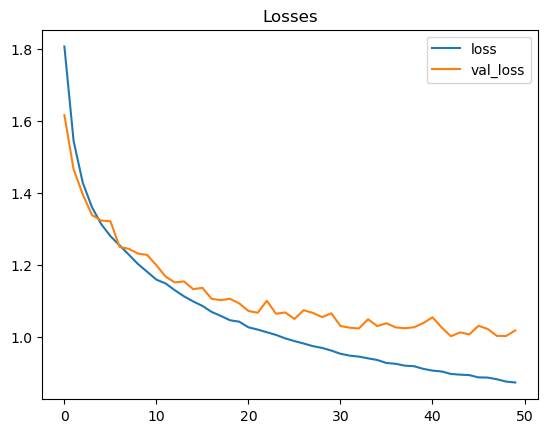

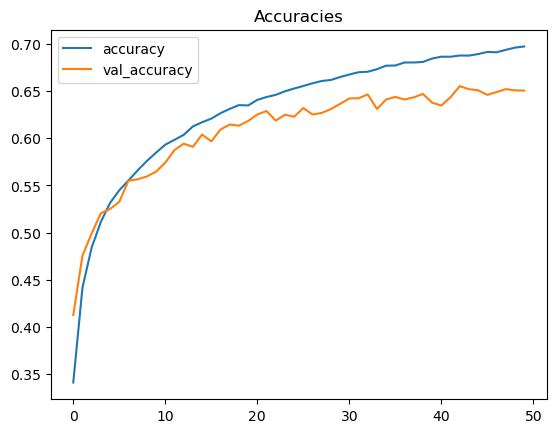

In [10]:
render_history(history)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(
    16,
    (3,3),
    activation="relu",
    input_shape=(32,32,3)
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    64,
    (3,3),
    activation="relu"
))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [16]:

model.compile(
    optimizer="adam", # optimizer=tf.optimizers.Adam(learning_rate=0.0001)
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=50
)

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 1.6739 - accuracy: 0.3889 - val_loss: 1.4380 - val_accuracy: 0.4828
Epoch 2/50
391/391 [==============================] - 7s 17ms/step - loss: 1.3824 - accuracy: 0.5028 - val_loss: 1.2995 - val_accuracy: 0.5346
Epoch 3/50
391/391 [==============================] - 6s 16ms/step - loss: 1.2782 - accuracy: 0.5480 - val_loss: 1.2075 - val_accuracy: 0.5734
Epoch 4/50
391/391 [==============================] - 7s 17ms/step - loss: 1.1924 - accuracy: 0.5800 - val_loss: 1.1726 - val_accuracy: 0.5868
Epoch 5/50
391/391 [==============================] - 8s 20ms/step - loss: 1.1278 - accuracy: 0.6054 - val_loss: 1.1676 - val_accuracy: 0.5861
Epoch 6/50
391/391 [==============================] - 7s 17ms/step - loss: 1.0757 - accuracy: 0.6230 - val_loss: 1.0770 - val_accuracy: 0.6254
Epoch 7/50
391/391 [==============================] - 7s 17ms/step - loss: 1.0331 - accuracy: 0.6380 - val_loss: 1.0377 - val_accuracy: 0.6383

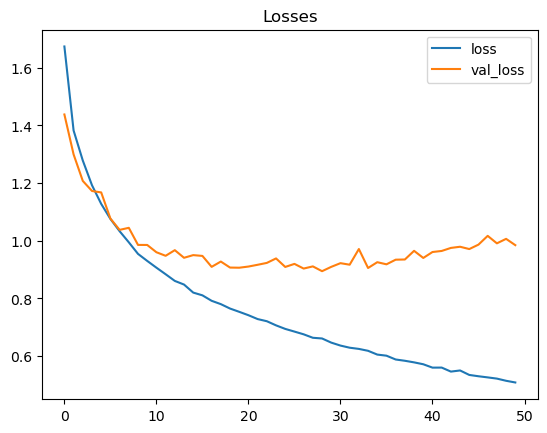

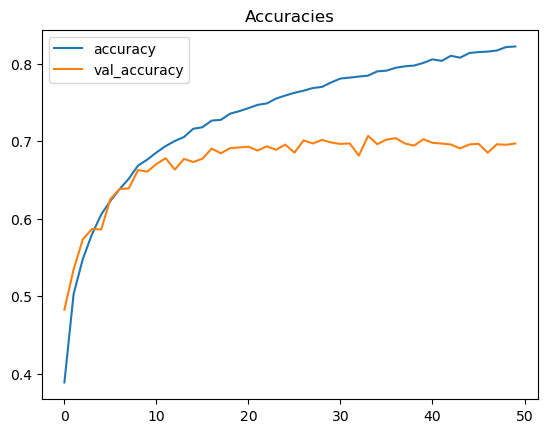

In [17]:
render_history(history)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(
    16,
    (3,3),
    activation="relu",
    input_shape=(32,32,3)
))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.Conv2D(
    64,
    (3,3),
    activation="relu"
))
model.add(layers.Conv2D(
    64,
    (3,3),
    activation="relu"
))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 32)        18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                      

In [23]:

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=30
)

Epoch 1/30
391/391 [==============================] - 29s 70ms/step - loss: 1.6772 - accuracy: 0.3912 - val_loss: 1.4140 - val_accuracy: 0.4838
Epoch 2/30
391/391 [==============================] - 26s 67ms/step - loss: 1.3491 - accuracy: 0.5185 - val_loss: 1.2396 - val_accuracy: 0.5541
Epoch 3/30
391/391 [==============================] - 26s 66ms/step - loss: 1.1846 - accuracy: 0.5816 - val_loss: 1.2469 - val_accuracy: 0.5658
Epoch 4/30
391/391 [==============================] - 26s 66ms/step - loss: 1.0617 - accuracy: 0.6281 - val_loss: 1.0301 - val_accuracy: 0.6412
Epoch 5/30
391/391 [==============================] - 26s 66ms/step - loss: 0.9776 - accuracy: 0.6564 - val_loss: 1.0282 - val_accuracy: 0.6392
Epoch 6/30
391/391 [==============================] - 27s 69ms/step - loss: 0.9121 - accuracy: 0.6835 - val_loss: 0.9367 - val_accuracy: 0.6711
Epoch 7/30
391/391 [==============================] - 27s 68ms/step - loss: 0.8556 - accuracy: 0.7004 - val_loss: 0.9538 - val_accuracy:

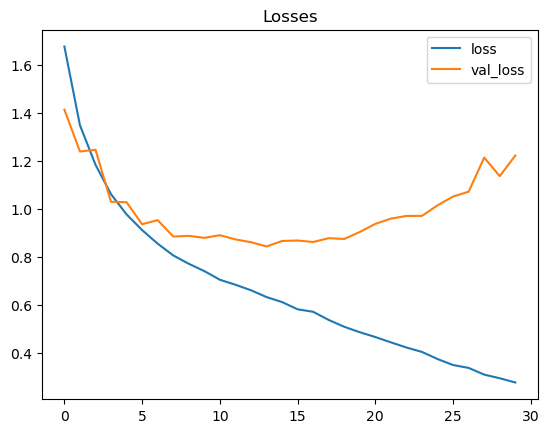

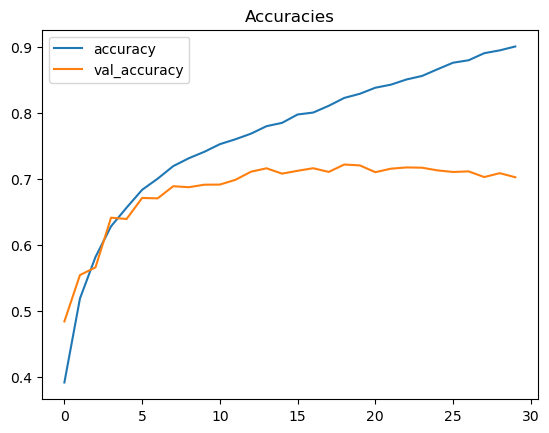

In [25]:
render_history(history)

In [33]:
model = models.Sequential()
# model.add(layers.Conv2D(
#     8,
#     (3,3),
#     activation="relu",
#     input_shape=(32,32,3)
# ))
model.add(layers.Conv2D(
    16,
    (3,3),
    activation="relu",
    input_shape=(32,32,3),
    padding="same"
))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    padding="same"
))
model.add(layers.Conv2D(
    64,
    (3,3),
    activation="relu",
    padding="same"
))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(
    128,
    (3,3),
    activation="relu",
    padding="same"
))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(
    128,
    (3,3),
    activation="relu",
    padding="same"
))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(
    64,
    (3,3),
    activation="relu",
    padding="same"
))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(
    64,
    (3,3),
    activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    padding="same"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))
# model.build()
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_94 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_95 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 dropout_18 (Dropout)        (None, 32, 32, 128)       0         
                                                                 
 conv2d_97 (Conv2D)          (None, 32, 32, 128)     

In [34]:

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=30
)

Epoch 1/30
391/391 [==============================] - 109s 262ms/step - loss: 2.3111 - accuracy: 0.1002 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/30
391/391 [==============================] - 97s 249ms/step - loss: 2.3034 - accuracy: 0.0996 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/30
244/391 [=================>............] - ETA: 35s - loss: 2.3030 - accuracy: 0.1024

KeyboardInterrupt: 